# Section 2 - Two Variables Function

In [1]:
import numpy as np
import math, random
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits import mplot3d
from matplotlib.pyplot import figure

In [2]:
def target_fn(x,y):
    return 4*x*x+y*y
def gradient_fn(x,y):
    return [8*x, 2*y]

In [4]:
def vector_sum(vectors):
    result=vectors[0]
    for vector in vectors[1:]:
        result=vector_add(result,vector)
    return result
def scalar_multiply(c,v):
    return [c*v_i for v_i in v]
#def vector_add(v,w):
#    return [v_i+w_i for v_i, w_i in zip(v,w)]
def vector_subtract(v,w):
    return [v_i-w_i for v_i, w_i in zip(v,w)]

In [5]:
# initial point
x=0.5
y=1.0

In [6]:
def TwoVariables(target_fn, gradient_fn, x, y, step):
    iterations_number = 0
    min_value = float('inf')
    path=[[x,y]]
    value=target_fn(x,y)
    height=[value]
    while iterations_number < 20:
        if value < min_value:
            min_value = value
        else:
            iterations_number += 1
            gradient = gradient_fn(x, y)   # gradient vector
            gradient_normal=gradient/np.sqrt(gradient[0]**2 + gradient[1]**2)   # normalize gradient vector
            xy = vector_subtract([x,y], scalar_multiply(step, gradient_normal)) # next step of (x, y)
            x=xy[0]
            y=xy[1]
            path.append(xy)
            value=target_fn(x,y)
            height.append(value)  # objective function value
    return height,path

In [7]:
out=TwoVariables(target_fn, gradient_fn, x, y, 0.1)
print(out[0])

[2.0, 1.5867864045000422, 1.2392294174257201, 0.953181828141784, 0.7227456974881092, 0.5397800982659076, 0.39425407320257577, 0.276657416182705, 0.1812315426472591, 0.10608469273297458, 0.050943479487257415, 0.01580217456633901, 0.0006608937505529148, 0.0055285319790616865, 0.0008592677066987959, 0.020392592746349254, 0.004336787127652495, 0.01825198220961239, 0.004229074869326254, 0.01822167545199883, 0.004226960310530944]


In [10]:
xx,yy=zip(*out[1])  # get the descent path

In [11]:
# build data for contour
xc = np.linspace(-0.1, 0.5, 60)
yc = np.linspace(-0.1, 1.0, 110)
xxc, yyc = np.meshgrid(xc, yc)
Z = target_fn(xxc, yyc)

Text(0, 0.5, 'Y')

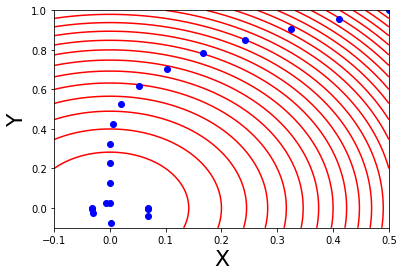

In [12]:
plt.plot(xx,yy,'o', color='blue')
plt.contour(xxc, yyc, Z, 30,colors='red')
plt.xlabel('X', fontsize=22)
plt.ylabel('Y', fontsize=22)

Text(0, 0.5, '$4x^2+y^2$')

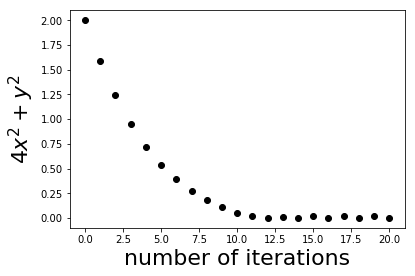

In [36]:
# descent on objective function 
plt.plot(out[0],'o',color='black')
plt.xlabel('number of iterations', fontsize=22)
plt.ylabel('$4x^2+y^2$', fontsize=22)

In [14]:
# build data for zoomed contour 
xc = np.linspace(0.0, 1.0, 100)
yc = np.linspace(0.5, 1.5, 100)
X, Y = np.meshgrid(xc, yc)
Z = 4*X**2 + Y**2

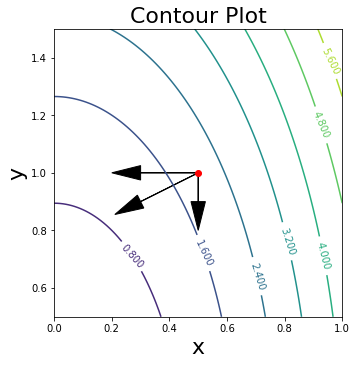

In [15]:
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.9, 0.1, 0.9, 0.8     # define the output plot size
ax = fig.add_axes([left, bottom, width, height]) 
plt.plot(0.5,1,'o', color='red')       # initial point
cp = ax.contour(X, Y, Z)               # zoomed contour
ax.clabel(cp, inline=True, fontsize=10)
ax.set_title('Contour Plot',fontsize=22)
ax.set_xlabel('x',fontsize=22)
ax.set_ylabel('y',fontsize=22)
plt.gca().set_aspect('equal', adjustable='box')    # define a squared plot so that no deformation of the plot
ax.arrow(0.5, 1.0, -0.2,  0.0, head_width=0.05, head_length=0.1, fc='k', ec='k')  # x-component of unit gradient vector
ax.arrow(0.5, 1.0,  0.0, -0.1, head_width=0.05, head_length=0.1, fc='k', ec='k')  # y-component of unit gradient vector
ax.arrow(0.5, 1.0, -0.2, -0.1, head_width=0.05, head_length=0.1, fc='k', ec='k')  # unit vector of gradient

# Get descent path along gradient 

In [19]:
# get function surface data

def z_function(x, y):
    return 4*x *x + y *y

x = np.linspace(-3, 3, 200)
y = np.linspace(-3, 3, 200)

Xs, Ys = np.meshgrid(x, y)
Zs = z_function(Xs, Ys)

In [20]:
# create gradient curve data

xp = [0.05*x for x in range(-50,50)]
yp = [0.5*s+0.75 for s in xp]             # linear function in (x,y) plane  y = 0.5 x + 0.75
zp = [4*x*x+y*y for x,y in zip(xp,yp)]    # z value of 3D curve 4(xp)^2+(yp)^2

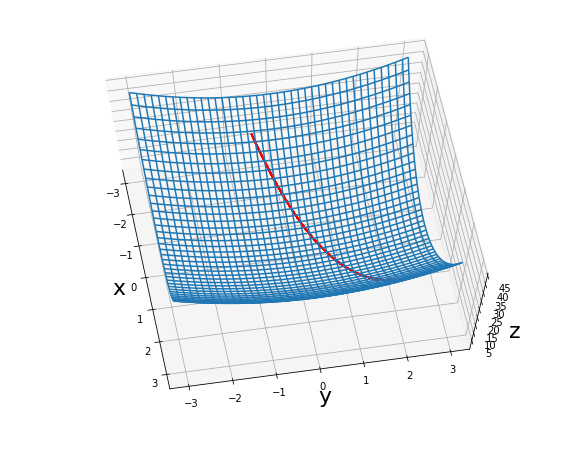

In [23]:
fig = plt.figure(figsize=(10, 8))

ax = plt.axes(projection='3d')
ax.plot_wireframe(Xs, Ys, Zs, rstride=5, cstride=5)   # plot the 3D surface of objective function 

# rotate the axes to find the best visualized plot
for ii in range(0,360, 10):
        ax.plot3D(xp,yp,zp, 'red')   # plot the descent path
        ax.set_xlabel('x',fontsize=22)
        ax.set_ylabel('y',fontsize=22)
        ax.set_zlabel('z',fontsize=22)
        ax.view_init(elev=70., azim=ii)  # scan azimuth angle with given elevation angle 70 degree
        fig.savefig("movie%d.png" % ii)